<a href="https://colab.research.google.com/github/tqan27/Practical-Discrete-Mathematics/blob/master/MalaysiaMapipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-12-11 03:41:05--  https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_MYS_shp.zip
Resolving geodata.ucdavis.edu (geodata.ucdavis.edu)... 128.120.146.30
Connecting to geodata.ucdavis.edu (geodata.ucdavis.edu)|128.120.146.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5856170 (5.6M) [application/zip]
Saving to: ‘gadm41_MYS_shp.zip’

gadm41_MYS_shp.zip  100%[===================>]   5.58M  10.9MB/s    in 0.5s    

2024-12-11 03:41:06 (10.9 MB/s) - ‘gadm41_MYS_shp.zip’ saved [5856170/5856170]

Archive:  gadm41_MYS_shp.zip
 extracting: gadm41_MYS_0.cpg        
  inflating: gadm41_MYS_0.dbf        
  inflating: gadm41_MYS_0.prj        
  inflating: gadm41_MYS_0.shp        
  inflating: gadm41_MYS_0.shx        
 extracting: gadm41_MYS_1.cpg        
  inflating: gadm41_MYS_1.dbf        
  inflating: gadm41_MYS_1.prj        
  inflating: gadm41_MYS_1.shp        
  inflating: gadm41_MYS_1.shx        
 extracting: gadm41_MYS_2.cpg        
  inflating: gadm41_MY

<Figure size 1000x1000 with 0 Axes>

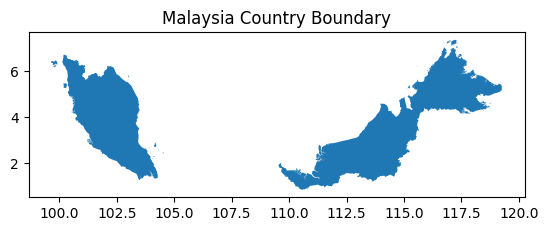

<ipython-input-1-8931ac5adec0>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = malaysia_gdf.geometry.centroid.y.mean(), malaysia_gdf.geometry.centroid.x.mean()


Interactive map saved as malaysia_map.html

Shapefile Information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GID_0     1 non-null      object  
 1   COUNTRY   1 non-null      object  
 2   geometry  1 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 152.0+ bytes
None


In [ ]:
# Install required libraries
!pip install geopandas folium matplotlib

# Download Malaysia Shapefile from GADM
!wget https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_M YS_shp.zip
!unzip gadm41_MYS_shp.zip

import geopandas as gpd
import folium
import matplotlib.pyplot as plt

# Read the shapefile (country level)
malaysia_gdf = gpd.read_file('gadm41_MYS_0.shp')

# Matplotlib Static Map
plt.figure(figsize=(10, 10))
malaysia_gdf.plot()
plt.title('Malaysia Country Boundary')
plt.show()

# Folium Interactive Map
# Calculate map center
center = malaysia_gdf.geometry.centroid.y.mean(), malaysia_gdf.geometry.centroid.x.mean()

# Create interactive map
m = folium.Map(location=center, zoom_start=5)

# Add country boundary to map
folium.GeoJson(
    malaysia_gdf.geometry.to_json(),
    name='Malaysia Boundary',
    style_function=lambda x: {
        'fillColor': 'blue',
        'color': 'red',
        'weight': 2,
        'fillOpacity': 0.3
    }
).add_to(m)

# Save interactive map
m.save('malaysia_map.html')
print("Interactive map saved as malaysia_map.html")

# Print basic information about the shapefile
print("\nShapefile Information:")
print(malaysia_gdf.info())